In [1]:
from sklearn.mixture import GaussianMixture
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm; tqdm.pandas()
pd.options.display.max_columns = 202
pd.options.display.max_rows = 300
import seaborn as sns
import hdbscan

In [2]:
train = pd.read_pickle('data/train_original.pkl')
test = pd.read_pickle('data/test_original.pkl')
special_cols = [col for col in train.columns if train[col].dtype != np.float64]
feature_cols = [col for col in train.columns if col not in special_cols]

train.drop(special_cols[0], axis=1, inplace=True)
test.drop(special_cols[0], axis=1, inplace=True)

unique_samples = []
unique_count = np.zeros_like(test)
for feature in tqdm(range(test.shape[1])):
    _, index_, count_ = np.unique(test.values[:, feature], return_counts=True, return_index=True)
    unique_count[index_[count_ == 1], feature] += 1

# Samples which have unique values are real the others are fake
real_samples_indexes = np.argwhere(np.sum(unique_count, axis=1) > 0)[:, 0]
synthetic_samples_indexes = np.argwhere(np.sum(unique_count, axis=1) == 0)[:, 0]

fake_test=test.iloc[synthetic_samples_indexes].reset_index(drop=True)
test=test.iloc[real_samples_indexes].reset_index(drop=True)

100%|████████████████████████████████████████████████████████████████████████████| 200/200 [00:06<00:00, 32.80it/s]


In [3]:
all_df = pd.concat([train[feature_cols], test[feature_cols]], axis=0).reset_index(drop=True)

### Cluster

In [4]:
from sklearn.cluster import KMeans
clusterer = KMeans(n_clusters=8)
clusterer.fit(all_df.values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

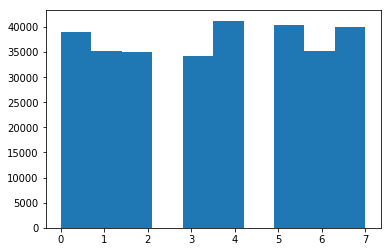

In [5]:
labels = clusterer.predict(all_df.values)
plt.hist(labels); plt.show()

In [6]:
dist = clusterer.transform(all_df.values)

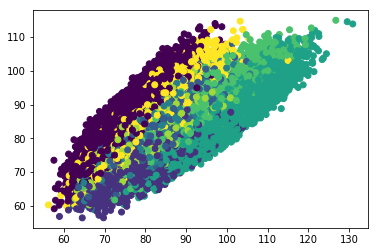

In [8]:
plt.scatter(dist[:,0], dist[:,1], c=labels); plt.show()

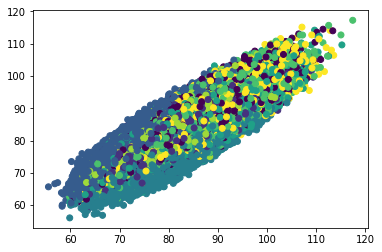

In [9]:
plt.scatter(dist[:,2], dist[:,3], c=labels); plt.show()

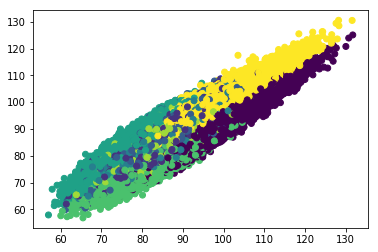

In [10]:
plt.scatter(dist[:,4], dist[:,5], c=labels); plt.show()

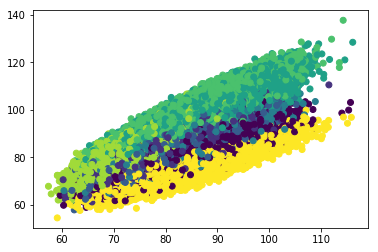

In [11]:
plt.scatter(dist[:,6], dist[:,7], c=labels); plt.show()

In [15]:
from sklearn.decomposition import PCA, NMF

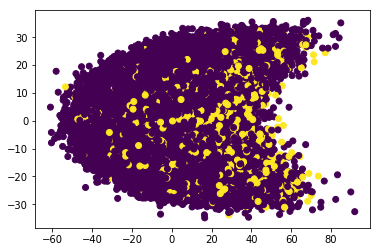

In [20]:
pca_dist = PCA(n_components=2).fit_transform(dist)
plt.scatter(pca_dist[:train.shape[0],0], pca_dist[:train.shape[0],1], c=train.target); plt.show()

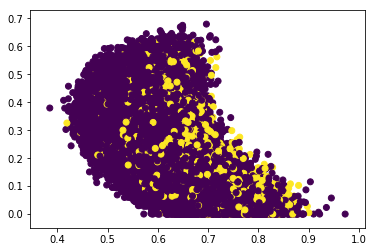

In [21]:
nmf_dist = NMF(n_components=2).fit_transform(dist)
plt.scatter(nmf_dist[:train.shape[0],0], nmf_dist[:train.shape[0],1], c=train.target); plt.show()

### Dimension Reduction

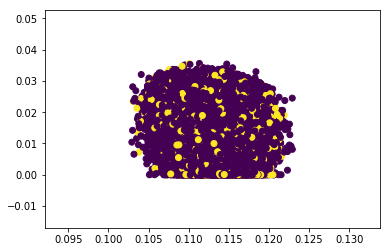

In [22]:
from sklearn.preprocessing import MinMaxScaler
nmf_dist = NMF(n_components=2).fit_transform(MinMaxScaler().fit_transform(all_df.values))
plt.scatter(nmf_dist[:train.shape[0],0], nmf_dist[:train.shape[0],1], c=train.target); plt.show()

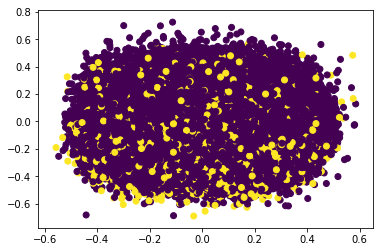

In [23]:
pca_dist = PCA(n_components=2).fit_transform(MinMaxScaler().fit_transform(all_df.values))
plt.scatter(pca_dist[:train.shape[0],0], pca_dist[:train.shape[0],1], c=train.target); plt.show()

### Dimension Reduction after converting to counts

In [25]:
for f in tqdm(feature_cols):
    all_df[f] = all_df[f].map(all_df[f].value_counts())

100%|████████████████████████████████████████████████████████████████████████████| 200/200 [00:33<00:00, 17.32it/s]


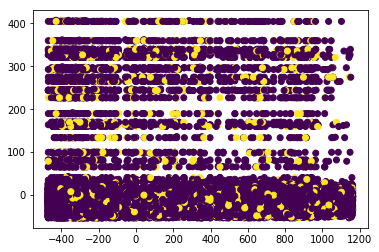

In [28]:
pca_dist = PCA(n_components=2).fit_transform(all_df.values)
plt.scatter(pca_dist[:train.shape[0],0], pca_dist[:train.shape[0],1], c=train.target); plt.show()

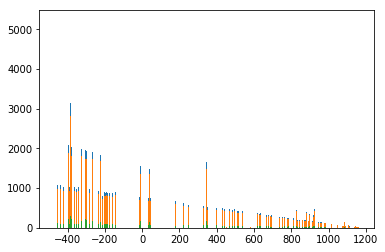

In [37]:
plt.hist(pca_dist[:train.shape[0],0], bins=1000); 
plt.hist(pca_dist[:train.shape[0],0][train.target==0], bins=1000); 
plt.hist(pca_dist[:train.shape[0],0][train.target==1], bins=1000); plt.show()

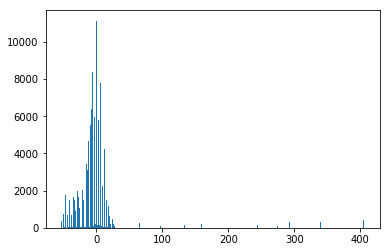

In [34]:
plt.hist(pca_dist[:,1], bins=1000); plt.show()

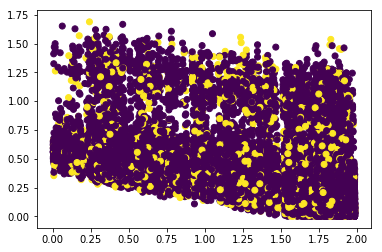

In [27]:
nmf_dist = NMF(n_components=2).fit_transform(all_df.values)
plt.scatter(nmf_dist[:train.shape[0],0], nmf_dist[:train.shape[0],1], c=train.target); plt.show()

c:\users\khyeh\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


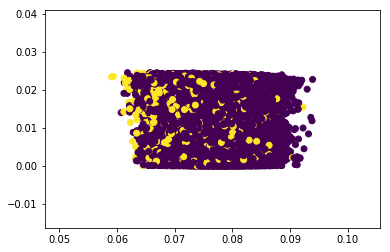

In [26]:
nmf_dist = NMF(n_components=2).fit_transform(MinMaxScaler().fit_transform(all_df.values))
plt.scatter(nmf_dist[:train.shape[0],0], nmf_dist[:train.shape[0],1], c=train.target); plt.show()